<a href="https://colab.research.google.com/github/SaraAcet/Beslenme.php/blob/main/kitap%C3%B6neriiiiii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# 📂 Dosyayı oku
file_path = "/content/drive/MyDrive/kitapProjesi/books.csv"
df = pd.read_csv(file_path)

# 📌 İlk satırlara göz at
df.head()


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [ ]:
import random
import pandas as pd

# 1. Kullanıcı sayısı
user_ids = list(range(1, 5001))  # 5000 kullanıcı

# 2. Kitap listesini al (NaN'leri at)
book_titles = df['title'].dropna().unique().tolist()

# 3. Rastgele atama için sınırları ayarla (kitap sayısı 6'dan azsa hata olmasın)
max_books = min(6, len(book_titles))
min_books = min(3, max_books)

user_book_data = []

for user_id in user_ids:
    selected_books = random.sample(book_titles, random.randint(min_books, max_books))
    for book in selected_books:
        user_book_data.append({'user_id': user_id, 'book_title': book})

# 4. DataFrame oluştur
df_user_books = pd.DataFrame(user_book_data)

# 5. One-hot encoding (kullanıcı-kitap matrisi)
df_encoded = df_user_books.pivot_table(index='user_id', columns='book_title', aggfunc=len, fill_value=0)
df_encoded = df_encoded.applymap(lambda x: 1 if x > 0 else 0)

df_encoded.head()




<ipython-input-84-cbe7af74cd29>:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_encoded.applymap(lambda x: 1 if x > 0 else 0)


book_title,"""A"" is for Abductive","""Gorgias"" and ""Phaedrus""","""Surely You're Joking, Mr. Feynman!""","""What Do You Care what Other People Think?""",$30 Film School,'I'm Telling You Stories','Photos of the Gods','Salem's Lot,'Tis,", said the shotgun to the head.",...,Zora Neale Hurston,Zora neale Hurston,eBay For Dummies,Αλκηστισ,בין אלקסרין,זן ואומנות האושר,ゲンジモノガタリ,五輪書 : 英文版,日本語の感情表現集,浅草紅団
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded = pd.crosstab(df_user_books['user_id'], df_user_books['book_title'])
df_encoded = df_encoded.applymap(lambda x: 1 if x > 0 else 0)



<ipython-input-85-040450502b89>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_encoded.applymap(lambda x: 1 if x > 0 else 0)


In [ ]:
!pip install mlxtend --quiet


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Kullanıcıların okuduğu kitaplar listesine dönüştürülüyor
user_books = df_user_books.groupby('user_id')['book_title'].apply(list).tolist()

# Bu listeden binary (0/1) matris oluşturuluyor
te = TransactionEncoder()
te_array = te.fit(user_books).transform(user_books)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)


In [ ]:
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# 3. Daha düşük min_support ile apriori çalıştır
min_support_value = 0.001  # %0.2 destek

frequent_itemsets = apriori(df_encoded, min_support=min_support_value, use_colnames=True)

if frequent_itemsets.empty:
    print(f"Uyarı: Sık geçen itemsetler boş! min_support={min_support_value} değerini düşürmeyi deneyin.")
else:
    # 4. Kuralları oluştur
    min_lift_value = 1.1
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_lift_value)

    if rules.empty:
        print(f"Uyarı: Kurallar boş! min_threshold (lift)={min_lift_value} değerini düşürmeyi deneyin.")
    else:
        # 5. En güçlü 10 kuralı sırala
        top_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']] \
                    .sort_values(by="confidence", ascending=False).head(10)
        print(top_rules)



/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Uyarı: Kurallar boş! min_threshold (lift)=1.1 değerini düşürmeyi deneyin.


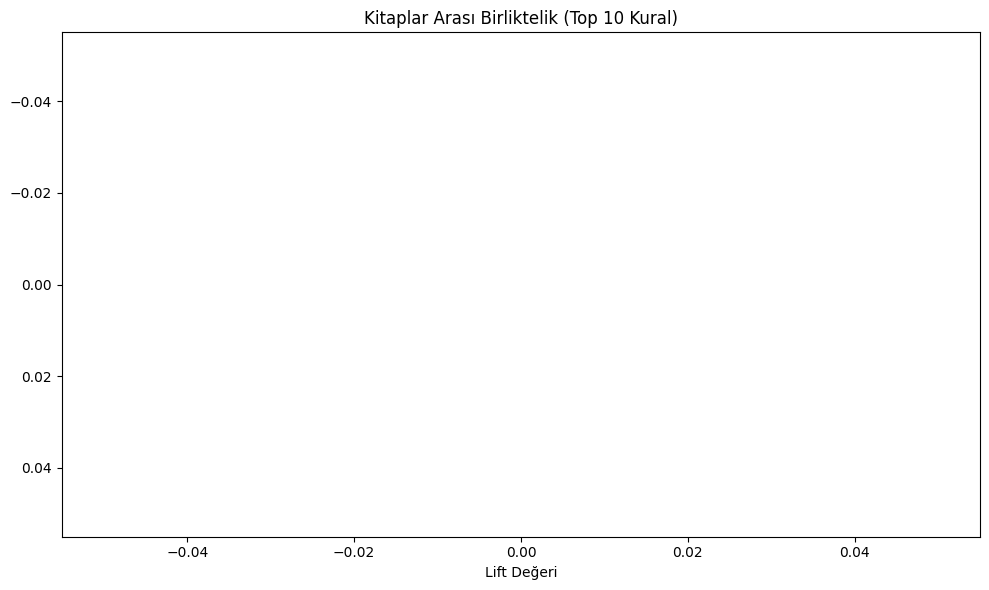

In [ ]:
import matplotlib.pyplot as plt

# Sadece en iyi 10 kuralı al
top_rules = rules.sort_values(by='confidence', ascending=False).head(10)

# Grafik için kitap isimlerini düzleştir
labels = [', '.join(list(x)) + " ➞ " + ', '.join(list(y)) for x, y in zip(top_rules['antecedents'], top_rules['consequents'])]

plt.figure(figsize=(10, 6))
plt.barh(labels, top_rules['lift'])
plt.xlabel('Lift Değeri')
plt.title('Kitaplar Arası Birliktelik (Top 10 Kural)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
!pip install gradio --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
import gradio as gr

# Kuralları string hale getiren yardımcı fonksiyon
def kitap_oner(kitap_adi):
    kitap_adi = kitap_adi.strip()
    öneriler = rules[rules['antecedents'].apply(lambda x: kitap_adi in list(x))]

    if öneriler.empty:
        return f"'{kitap_adi}' için yeterli veri bulunamadı."

    # İlk 3 öneriyi alalım
    öneriler = öneriler.sort_values(by='confidence', ascending=False).head(3)

    sonuc = f"📚 '{kitap_adi}' kitabını okuyan kullanıcılar ayrıca şu kitapları da seviyor:\n\n"
    for _, row in öneriler.iterrows():
        önerilen = ', '.join(list(row['consequents']))
        sonuc += f"👉 {önerilen} (Confidence: {row['confidence']:.2f}, Lift: {row['lift']:.2f})\n"

    return sonuc


/usr/local/lib/python3.11/dist-packages/websockets/legacy/__init__.py:6: DeprecationWarning: websockets.legacy is deprecated; see https://websockets.readthedocs.io/en/stable/howto/upgrade.html for upgrade instructions
  warnings.warn(  # deprecated in 14.0 - 2024-11-09


In [ ]:
# Seçilebilecek kitaplar
kitap_listesi = sorted(df_user_books['book_title'].unique().tolist())

gr.Interface(
    fn=kitap_oner,
    inputs=gr.Dropdown(choices=kitap_listesi, label="Kitap Seç:"),
    outputs="text",
    title="📖 Kitap Birliktelik Öneri Sistemi",
    description="Seçtiğiniz kitapla birlikte en çok okunan kitapları confidence ve lift değerleriyle görün."
).launch()


/usr/local/lib/python3.11/dist-packages/uvicorn/protocols/websockets/websockets_impl.py:17: DeprecationWarning: websockets.server.WebSocketServerProtocol is deprecated
  from websockets.server import WebSocketServerProtocol


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3e3ed9a1060205de0e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# 1. İşlem sepetlerini hazırla
transactions = df_user_books.groupby('user_id')['book_title'].apply(list).tolist()

# 2. 1-0 matrisi
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 3. Apriori analizi
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# 4. Kuralları çıkar
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)


<ipython-input-18-d040757fc6c5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rules['lift'], y=labels, palette='Blues_d')


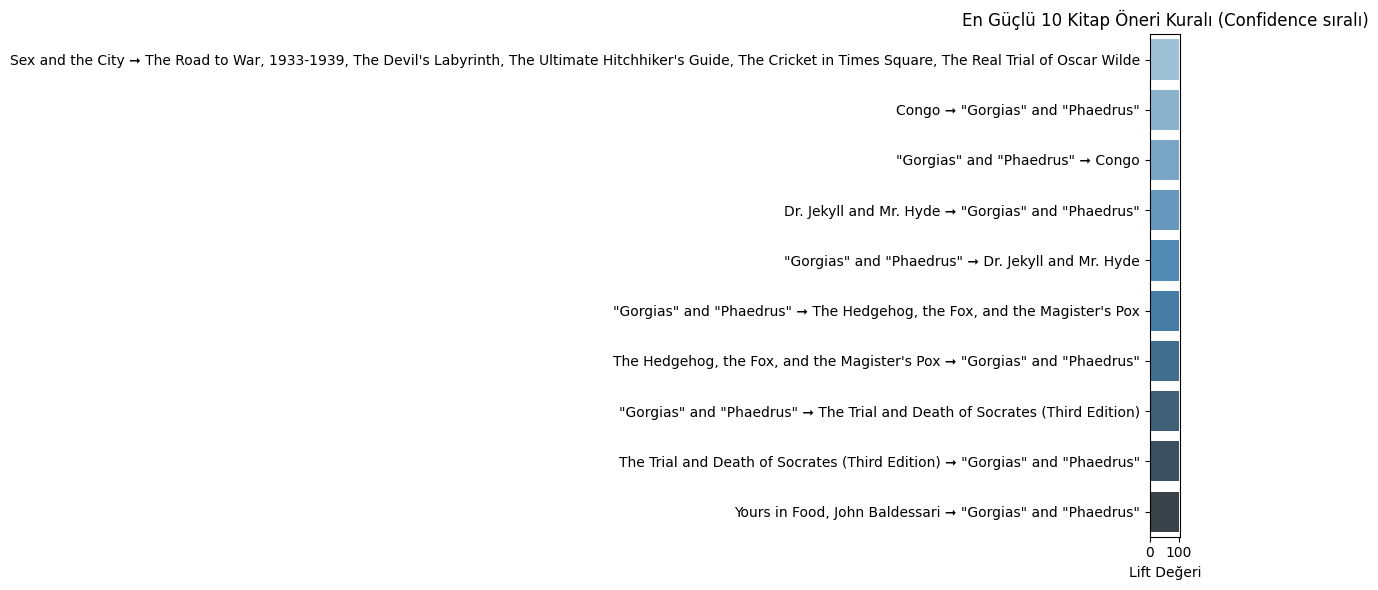

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# En yüksek confidence ve lift değerlerine sahip ilk 10 kural
top_rules = rules.sort_values(by='confidence', ascending=False).head(10)

# Kuralları görsel etiket haline getir
labels = [f"{', '.join(list(row['antecedents']))} ➞ {', '.join(list(row['consequents']))}" for _, row in top_rules.iterrows()]

# Grafik çizimi
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rules['lift'], y=labels, palette='Blues_d')
plt.xlabel('Lift Değeri')
plt.title('En Güçlü 10 Kitap Öneri Kuralı (Confidence sıralı)')
plt.tight_layout()
plt.show()


<ipython-input-19-116d55395951>:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


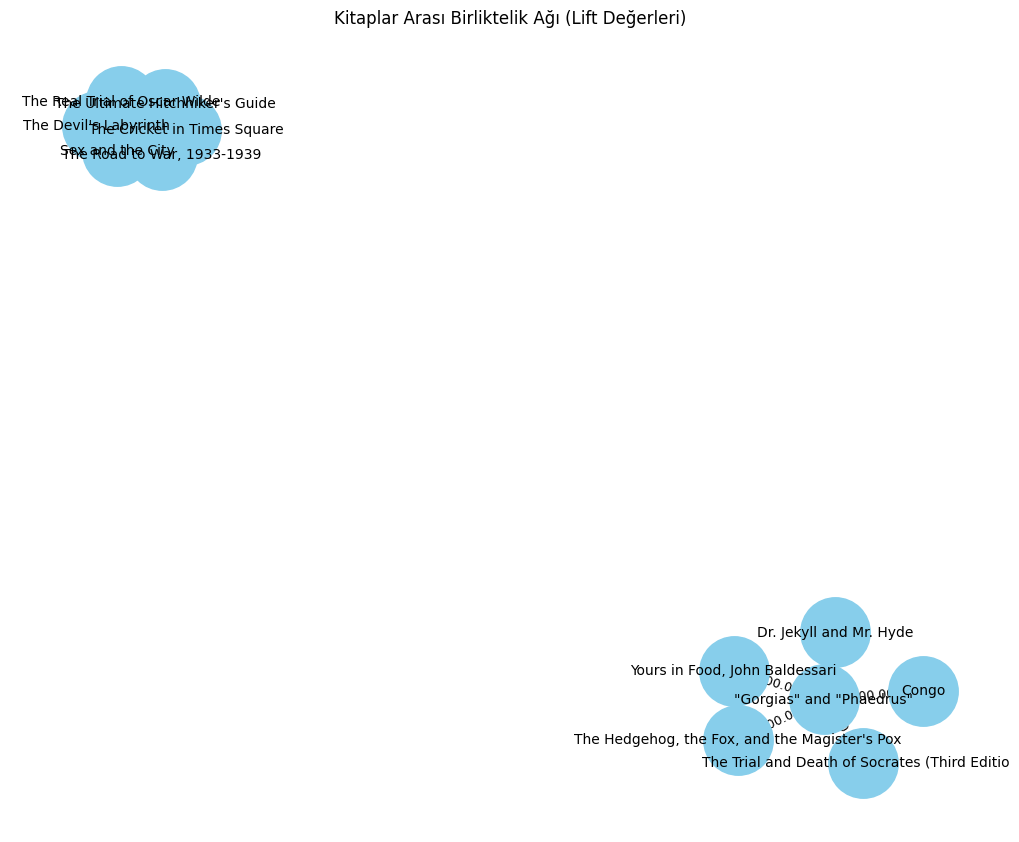

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# En iyi 20 kuralı alalım (fazla karışmasın)
top_rules = rules.sort_values(by='lift', ascending=False).head(20)

# Ağ grafiği oluştur
G = nx.DiGraph()

for _, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

# Pozisyonları belirle
pos = nx.spring_layout(G, k=0.5, seed=42)

plt.figure(figsize=(10, 8))
edges = G.edges(data=True)

# Kenar kalınlıkları için lift değerini kullan
edge_weights = [d['weight'] for (u, v, d) in edges]
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=2500, font_size=10, arrows=True, width=2)

# Kenar etiketleri: lift değeri
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=9)

plt.title("Kitaplar Arası Birliktelik Ağı (Lift Değerleri)")
plt.axis('off')
plt.tight_layout()
plt.show()
